<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S9-V3/S9_AssignmentSolution(V3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount your G-Drive**

In [ ]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Add Library Path in your def search path**

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/EVA4/evaLibraryS9')
!ls '/content/drive/My Drive/EVA4/evaLibraryS9'

alb2.py		       DataLoaders.py  Gradcam.py   rohan_library.py
AlbTestTransforms.py   displayData.py  __pycache__
AlbTrainTransforms.py  execute.py      resNet.py


**Import required libraries**

In [ ]:
from rohan_library import *
import execute
from resNet import ResNet18
import displayData as display
import Gradcam 
# from Gradcam import GRADCAM, PLOT
import albumentations as alb
import DataLoaders as loader
import AlbTrainTransforms
import AlbTestTransforms

REQUIRED LIBRARIES LOADED...


**Albumentations**

In [ ]:
from albumentations import Compose, RandomCrop, Normalize, Resize, Rotate, Cutout, PadIfNeeded, RandomCrop, Flip
from albumentations.pytorch import ToTensor
import numpy as np



albTrain = AlbTrainTransforms.train_transforms()
albTest = AlbTestTransforms.test_transforms()

**Load the Datasets**

In [ ]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = albTrain)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = albTest)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**DataLoader for Train & Test Dataset**

In [ ]:
dl = loader.DataLoaders()
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


In [ ]:
dataiter = iter(trainLoader)

images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


**Displaying Random Images**

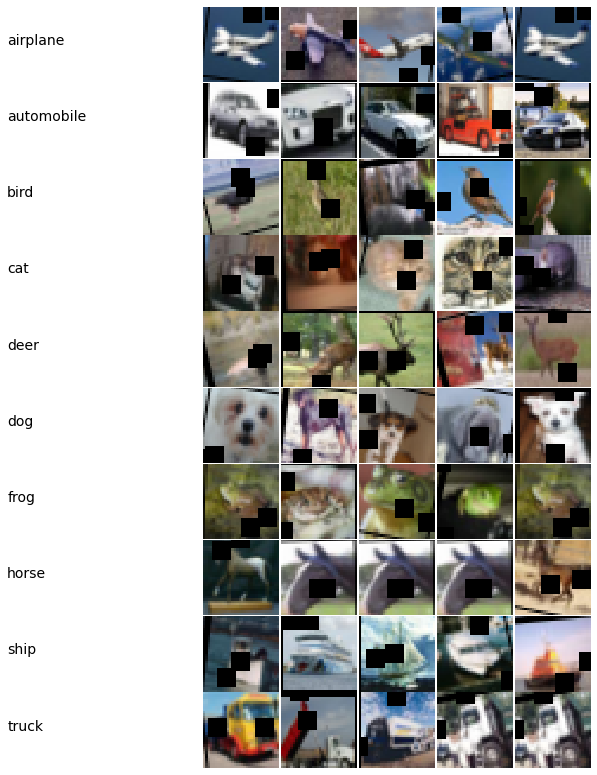

In [ ]:
display.classImages(trainLoader)

**Model Summary**

In [ ]:
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('Device set to ', device)


Device set to  cuda


In [ ]:
model = ResNet18(GBN=True).to(device)
summary(model, input_size=(3,32,32))

<class 'int'>
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
    GhostBatchNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
    GhostBatchNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
    GhostBatchNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
    GhostBatchNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
   GhostBatchNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
   GhostBatchNorm-14     

**Modelling**

In [ ]:
incorrectSamples = []
correctSamples = []
correctLabels = []
model = ResNet18().to(device)


criterion = execute.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainLoader), epochs = 30)


model1 = execute.Test_Train()
EPOCHS = 30


for epoch in range(1, EPOCHS+1):

  print('EPOCH: ',epoch)
  model1.train(model, device, trainLoader, optimizer, epoch, scheduler, criterion, L1lambda = 1e-5 )

  model1.test(model, device, testLoader, 'model1.pt', criterion, correctSamples, correctLabels, incorrectSamples)

  0%|          | 0/391 [00:00<?, ?it/s]

<class 'int'>
EPOCH:  1


Loss=2.3993778228759766 Batch_id=390 Accuracy=43.73: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.1494).  Saving model ...

Test set: Average loss: 1.1494, Accuracy: 5593/10000 (55.93%)

EPOCH:  2


Loss=1.8267278671264648 Batch_id=390 Accuracy=60.35: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.1494 --> 1.0869).  Saving model ...

Test set: Average loss: 1.0869, Accuracy: 6460/10000 (64.60%)

EPOCH:  3


Loss=1.815322995185852 Batch_id=390 Accuracy=69.18: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2238, Accuracy: 7265/10000 (72.65%)

EPOCH:  4


Loss=1.6664260625839233 Batch_id=390 Accuracy=74.10: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0869 --> 0.5879).  Saving model ...

Test set: Average loss: 0.5879, Accuracy: 7737/10000 (77.37%)

EPOCH:  5


Loss=1.612652063369751 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5879 --> 0.5309).  Saving model ...

Test set: Average loss: 0.5309, Accuracy: 7980/10000 (79.80%)

EPOCH:  6


Loss=1.5937676429748535 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5309 --> 0.1877).  Saving model ...

Test set: Average loss: 0.1877, Accuracy: 8223/10000 (82.23%)

EPOCH:  7


Loss=1.332169771194458 Batch_id=390 Accuracy=81.63: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4531, Accuracy: 8301/10000 (83.01%)

EPOCH:  8


Loss=1.3006327152252197 Batch_id=390 Accuracy=83.16: 100%|██████████| 391/391 [00:58<00:00,  6.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2527, Accuracy: 8298/10000 (82.98%)

EPOCH:  9


Loss=1.274045467376709 Batch_id=390 Accuracy=84.50: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5480, Accuracy: 8530/10000 (85.30%)

EPOCH:  10


Loss=1.4447596073150635 Batch_id=390 Accuracy=85.31: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4435, Accuracy: 8338/10000 (83.38%)

EPOCH:  11


Loss=1.6077896356582642 Batch_id=390 Accuracy=86.46: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7754, Accuracy: 8404/10000 (84.04%)

EPOCH:  12


Loss=1.3639236688613892 Batch_id=390 Accuracy=86.71: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2870, Accuracy: 8484/10000 (84.84%)

EPOCH:  13


Loss=1.3148407936096191 Batch_id=390 Accuracy=88.03: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5322, Accuracy: 8624/10000 (86.24%)

EPOCH:  14


Loss=0.9593429565429688 Batch_id=390 Accuracy=88.29: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5626, Accuracy: 8654/10000 (86.54%)

EPOCH:  15


Loss=1.0032812356948853 Batch_id=390 Accuracy=89.32: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3430, Accuracy: 8595/10000 (85.95%)

EPOCH:  16


Loss=1.1367262601852417 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6502, Accuracy: 8548/10000 (85.48%)

EPOCH:  17


Loss=1.1067752838134766 Batch_id=390 Accuracy=90.30: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4447, Accuracy: 8755/10000 (87.55%)

EPOCH:  18


Loss=0.9995589256286621 Batch_id=390 Accuracy=90.38: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4332, Accuracy: 8622/10000 (86.22%)

EPOCH:  19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3009, Accuracy: 8627/10000 (86.27%)

EPOCH:  20


Loss=0.9841194152832031 Batch_id=390 Accuracy=91.44: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6172, Accuracy: 8747/10000 (87.47%)

EPOCH:  21


Loss=1.029988408088684 Batch_id=390 Accuracy=91.50: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5387, Accuracy: 8727/10000 (87.27%)

EPOCH:  22


Loss=0.9492353200912476 Batch_id=390 Accuracy=91.94: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4468, Accuracy: 8759/10000 (87.59%)

EPOCH:  23


Loss=0.9553390741348267 Batch_id=390 Accuracy=92.18: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.1877 --> 0.0348).  Saving model ...

Test set: Average loss: 0.0348, Accuracy: 8548/10000 (85.48%)

EPOCH:  24


Loss=1.022128701210022 Batch_id=390 Accuracy=92.53: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6076, Accuracy: 8681/10000 (86.81%)

EPOCH:  25


Loss=0.8300677537918091 Batch_id=390 Accuracy=92.78: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1909, Accuracy: 8780/10000 (87.80%)

EPOCH:  26


Loss=0.9589564800262451 Batch_id=390 Accuracy=92.75: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4901, Accuracy: 8781/10000 (87.81%)

EPOCH:  27


Loss=0.8555641174316406 Batch_id=390 Accuracy=93.21: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7185, Accuracy: 8786/10000 (87.86%)

EPOCH:  28


Loss=0.9609363079071045 Batch_id=390 Accuracy=93.32: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1905, Accuracy: 8831/10000 (88.31%)

EPOCH:  29


Loss=0.7528522610664368 Batch_id=390 Accuracy=93.30: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1787, Accuracy: 8703/10000 (87.03%)

EPOCH:  30


Loss=0.7604323625564575 Batch_id=390 Accuracy=93.73: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]



Test set: Average loss: 0.4899, Accuracy: 8922/10000 (89.22%)



**Plot Train & Test Curves**

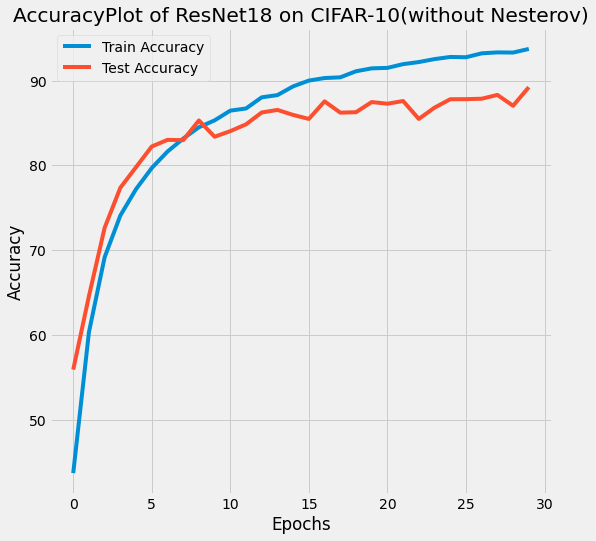

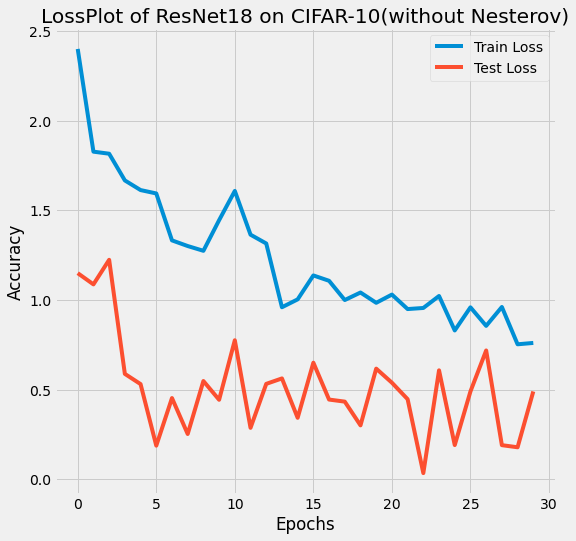

In [27]:
acc_elems = [(model1.train_acc, 'Train Accuracy'), (model1.test_acc, 'Test Accuracy')]
loss_elems = [(model1.train_losses, 'Train Loss'), (model1.test_losses, 'Test Loss')]
display.plot_curve(acc_elems, 'AccuracyPlot of ResNet18 on CIFAR-10(without Nesterov)')
display.plot_curve(loss_elems,'LossPlot of ResNet18 on CIFAR-10(without Nesterov)')

**Data for GradCam**

In [ ]:

images = [x['image'] for x in incorrectSamples[10:20]]
target_classes = [l['label'] for l in incorrectSamples[10:20]]
# print(images)
for i in target_classes:
  print(classes[i])


dog
plane
dog
horse
deer
frog
cat
car
horse
dog


**GradCam Implementation**

<class 'int'>
torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


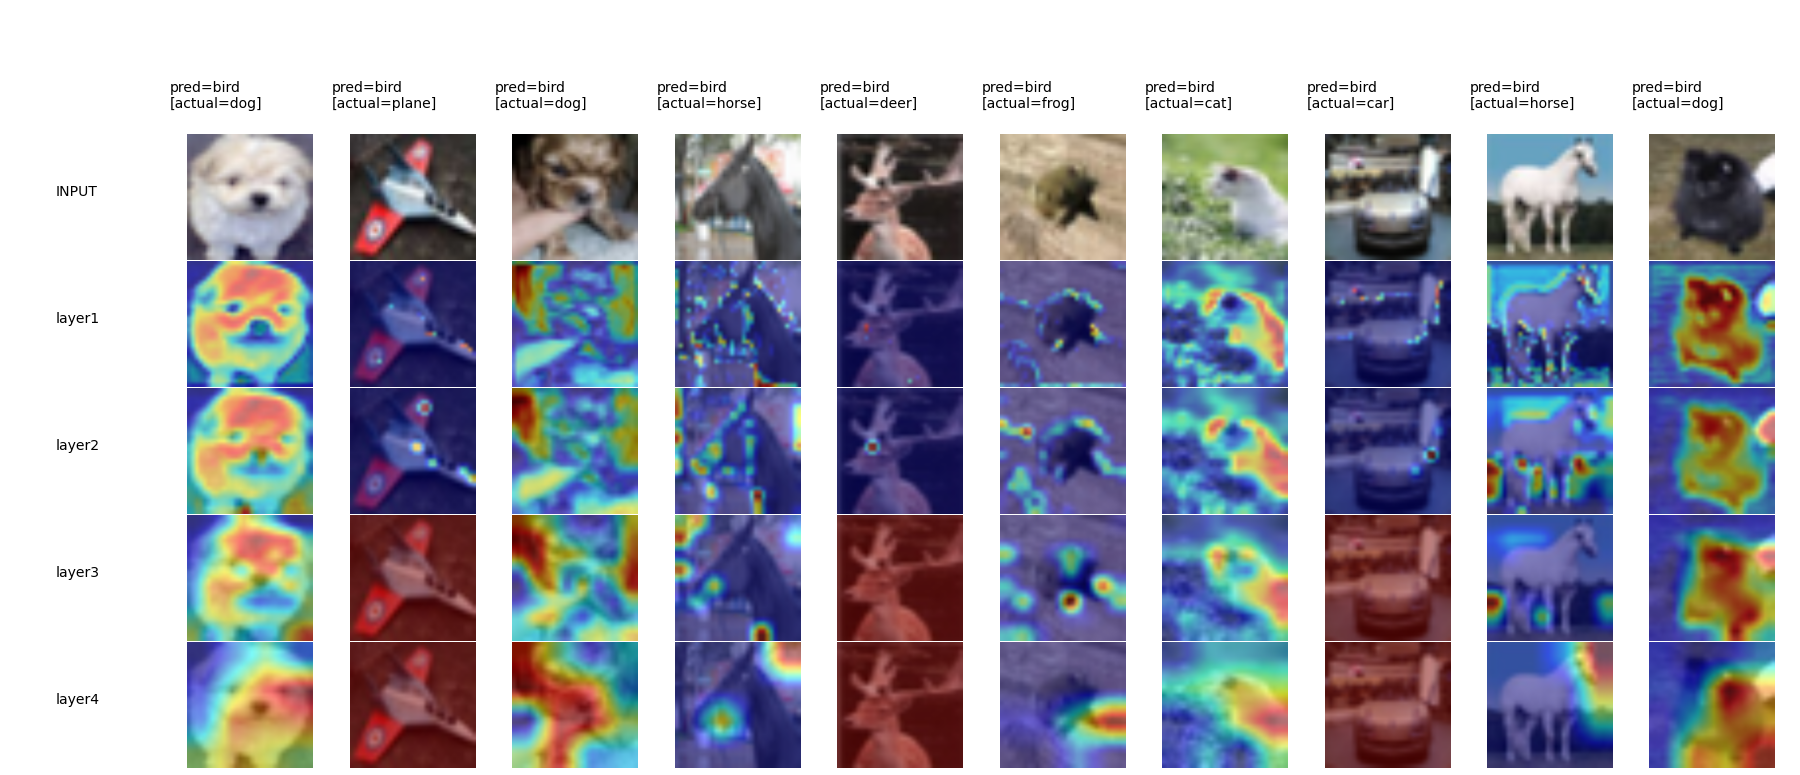

In [28]:
model = ResNet18().to(device)
image_size = (3,32,32)


target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = Gradcam.GRADCAM(images, device, target_classes, model, target_layers)
Gradcam.PLOT(gradcam_output, images, target_classes, target_layers, classes, image_size, predicted_classes, display.unnormalize)


<Figure size 936x936 with 0 Axes>

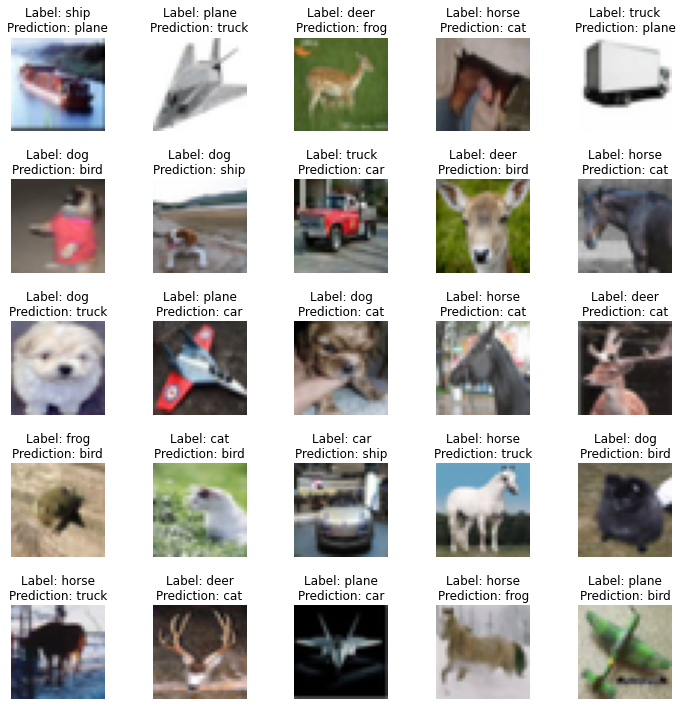

In [ ]:
display.misclassifiedOnes(model, testLoader, incorrectSamples,'Misclassfied.png')